# Isolation Forest Metrics Using http Subset

This program uses the precision, recall, fscore, and false alarm rate evaluation metrics for the Isolation Forest algorithm using the http subset. The following plots are produced below:

- Precision
- Recall
- Binary F1 Score
- Weighted F1 Score
- False Alarm Rate
- Grouped: Precision, Recall, Binary F1 Score
- Grouped: Precision, Recall Weighted F1 Score

(The x-axis represents the number of max samples and the y-axis represents the scores for the metrics)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
import numpy as np

kdd99_data = fetch_kddcup99(subset='http')
X = kdd99_data['data']
y = kdd99_data['target']

y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

recall_scores = []
precision_scores = []
f1_scores = []
weighted_f1_scores = []
false_alarms = []

def calculations(n):
    
    isof = IsolationForest(max_samples=n, random_state=42)
    y_pred = isof.fit_predict(X)
    y_pred = np.array(y_pred)
    
    p = precision_score(y, y_pred, pos_label = -1)
    r = recall_score(y, y_pred, pos_label = -1)
    f = f1_score(y, y_pred, pos_label = -1)
    wf = f1_score(y, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)
    weighted_f1_scores.append(wf)
    false_alarms.append(false_alarm)
    
    print(set(y_pred))

In [3]:
ilist = []
i = 5
while i<59000:
    calculations(i)
    ilist.append(i)
    i=i*2

{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}
{1, -1}


In [4]:
calculations(2000)
ilist.append(2000)

{1, -1}


In [5]:
print('Number of Max Samples: ', ilist)

Number of Max Samples:  [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480, 40960, 2000]


In [6]:
print(X.shape)

(58725, 3)


In [7]:
print(set(y))
# print(set(y_pred))

{1, -1}


In [8]:
ilist.sort()
print(ilist)

[5, 10, 20, 40, 80, 160, 320, 640, 1280, 2000, 2560, 5120, 10240, 20480, 40960]


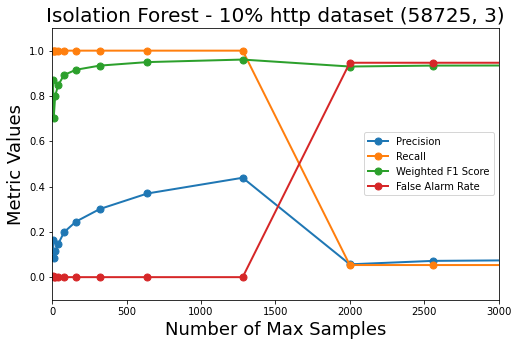

In [25]:
plt.figure(figsize = (8,5))

plt.plot(ilist, precision_scores, marker='o', linewidth=2, markersize=7, label = 'Precision')
plt.plot(ilist, recall_scores, marker='o', linewidth=2, markersize=7, label = 'Recall')
plt.plot(ilist, weighted_f1_scores, marker='o', linewidth=2, markersize=7, label = 'Weighted F1 Score')
plt.plot(ilist, false_alarms,marker='o', linewidth=2, markersize=7, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples', fontsize = 18)
plt.ylabel('Metric Values', fontsize = 18)
plt.title('Isolation Forest - 10% http dataset (58725, 3)', fontsize = 20)  
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.xlim((0, 3000))

plt.show()

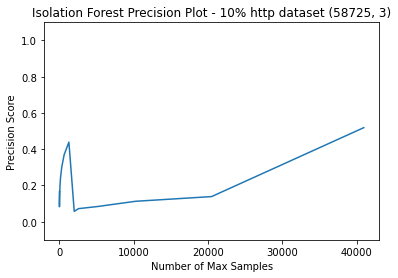

In [10]:
# Precision
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Precision Score')
plt.title('Isolation Forest Precision Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

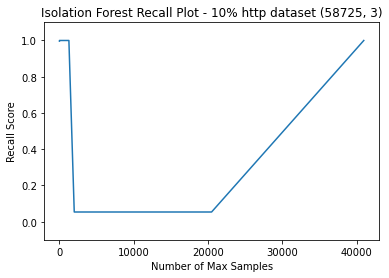

In [11]:
# Recall
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Recall Score')
plt.title('Isolation Forest Recall Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

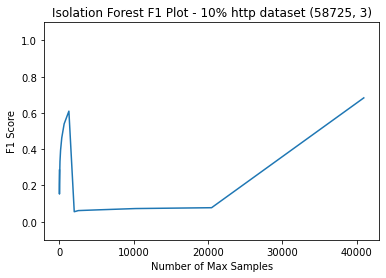

In [12]:
# Binary F1 Score
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('F1 Score')
plt.title('Isolation Forest F1 Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

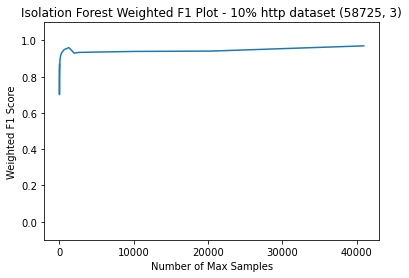

In [13]:
# Weighted F1 Score
plt.plot(ilist, weighted_f1_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Weighted F1 Score')
plt.title('Isolation Forest Weighted F1 Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

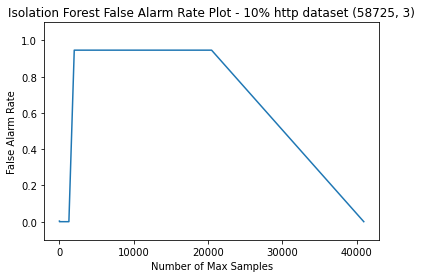

In [14]:
# False Alarm
plt.plot(ilist, false_alarms)
plt.xlabel('Number of Max Samples')
plt.ylabel('False Alarm Rate')
plt.title('Isolation Forest False Alarm Rate Plot - 10% http dataset (58725, 3)')

plt.ylim((-.1, 1.1))

plt.show()

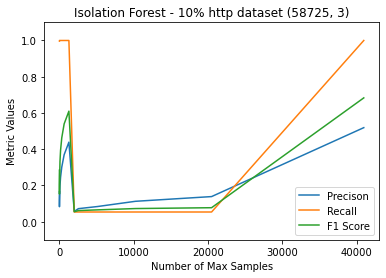

In [15]:
# Grouped - Precision, Recall, Binary F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

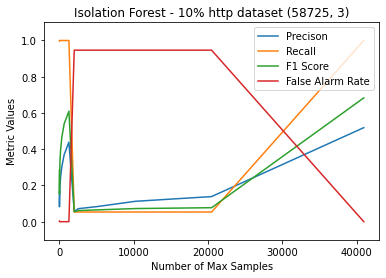

In [16]:
# Grouped - Precision, Recall, Binary F1, False Alarm
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

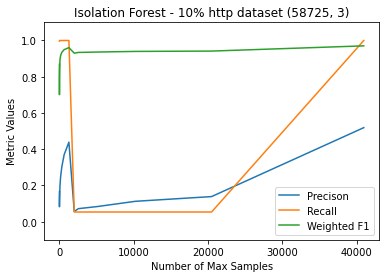

In [17]:
# Grouped - Precision, Recall, Weighted F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, weighted_f1_scores,label='Weighted F1')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

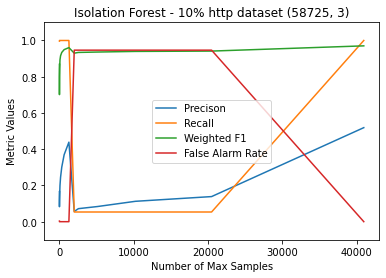

In [18]:
# Grouped - Precision, Recall, Weighted F1, False Alarm Rate
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, weighted_f1_scores,label='Weighted F1')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

In [19]:
def single_calculation(n):
    
    isof = IsolationForest(max_samples=n, random_state=42)
    y_pred = isof.fit_predict(X)
    y_pred = np.array(y_pred)
    
    p = precision_score(y, y_pred, pos_label = -1)
    r = recall_score(y, y_pred, pos_label = -1)
    f = f1_score(y, y_pred, pos_label = -1)
    wf = f1_score(y, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    
    print('Isolation Forest http')
    print('Value of Max Samples:', n)
    print('Precision:',p)
    print('Recall:',r)
    print('Weighted F1:',wf)
    print('False Alarm Rate:', false_alarm)

In [20]:
single_calculation(2000)

Isolation Forest http
Value of Max Samples: 2000
Precision: 0.5189100305379375
Recall: 1.0
Weighted F1: 0.9703267655562592
False Alarm Rate: 0.0


In [21]:
single_calculation(5000)

Isolation Forest http
Value of Max Samples: 5000
Precision: 0.0731556106633602
Recall: 0.05341783612494341
Weighted F1: 0.9343347033774014
False Alarm Rate: 0.9465821638750566


In [22]:
single_calculation(20725)

Isolation Forest http
Value of Max Samples: 20725
Precision: 0.10795974382433669
Recall: 0.05341783612494341
Weighted F1: 0.9392229729991597
False Alarm Rate: 0.9465821638750566


In [24]:
print(max(precision_scores))
print(min(false_alarms))
print(ilist)

0.5189100305379375
0.0
[5, 10, 20, 40, 80, 160, 320, 640, 1280, 2000, 2560, 5120, 10240, 20480, 40960]
